# Dirac notation experiments
Solve using different transient non-line-of-sight algorithms using the Dirac notation

In [1]:
import numpy as np
import tal
import src.dirac_types as dirac
import src.dirac_io as io

import matplotlib.pyplot as plt

Load the observations from the captured data. The results are:

<style>
td, th {
   border: none!important;
}
</style>

<table border="0">
 <tr>
    <td>T_mn[m, n, t] </td>
    <td> &rarr; </td>
    <td> Observations captured at the relay wall, for m sensors, with n illumination points, at time t </td>
 </tr>
 <tr>
   <td>ks[m] </td>
   <td>&rarr; </td>
   <td> Sensor at the relay wall positions</td>
 </tr>
 <tr>
   <td>offset_ks[m] </td><td>&rarr; </td><td>Distance for each sensor at the relay wall to the sensor device</td>
 </tr>
 <tr>
   <td>offset_kl[n] </td><td>&rarr; </td><td>Distance for each light source at the relay wall to the laser</td>
 </tr>
 <tr>
   <td>kt[t] &nbsp;&nbsp;</td><td>&rarr; </td><td>Time stamps for each moment k of the data</td>
 </tr>
</table>

<!-- - $ T_{mn}[m, n, t] $ &nbsp;&nbsp;&rarr;&nbsp; Observations captured at the relay wall, for m sensors, with n illumination points, at time t
- $ ks[m] $ &nbsp;&nbsp;&rarr; Sensor at the relay wall positions
- $ kl[n] $ &nbsp;&nbsp;&rarr; Light sources at the relay wall positions
- $ offset_{ks}[m] $ &rarr; Distance for each sensor at the relay wall to the sensor device
- $ offset_{kl}[n] $ &rarr; Distance for each light source at the relay wall to the laser
- $ kt[t] $ &nbsp;&nbsp;&rarr; Time stamps for each moment k of the data -->


In [2]:
T_mn, ks, kl, offset_ks, offset_kl, kt = io.read_observations('D:/Documentos/NLOS/nlos_dataset/mesh_R_256x256/front/data.hdf5')

Modify the data to generate a second pulse at the moment t_0

In [3]:
# Index and time stamp to pad
t_idx = np.array([0, 200, 500])
t_0 = kt[t_idx]
pad_T_mn = lambda n: np.pad(T_mn, ((0,0), (0,0), (n, 0)), 'minimum')[:, :, :kt.shape[0]]
illuminated_T_mn = np.array(list(map(pad_T_mn, t_idx)))
# Combined different illuminations
T_mn = np.sum(illuminated_T_mn, axis = 0)

Plot the input data

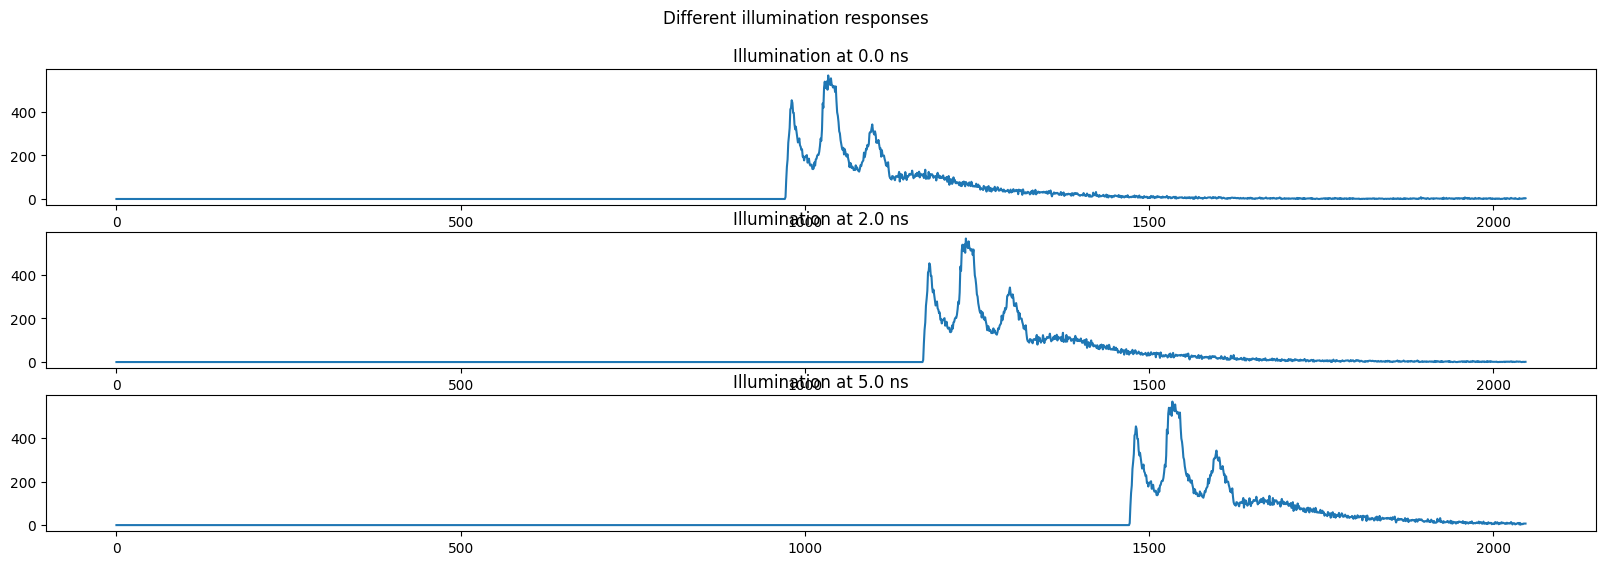

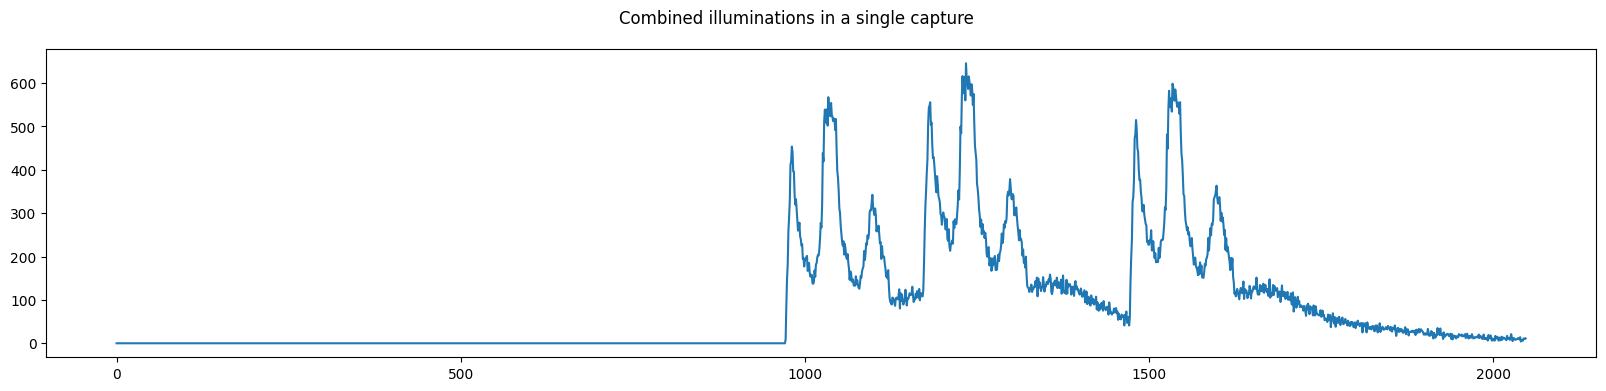

In [4]:
# Plot the different illuminations
fig, axes = plt.subplots(t_idx.shape[0], figsize=(20, 6))
fig.suptitle('Different illumination responses')
for i, T_p in enumerate(illuminated_T_mn):
    axes[i].plot(T_p[0,0])
    axes[i].set_title(f'Illumination at {t_0[i]/3e-1} ns')

# Plot combined illuminations in a single capture
fig = plt.figure(figsize=(20, 4))
fig.suptitle('Combined illuminations in a single capture')
plt.plot(T_mn[0,0])

plt.show()

## Quantum state observations
The observations are in the Real measurement. To transform them into the quantum state, it is used a change of basis.

### Illumination pulses

Delta illumination pulse:

$$ l_n^* (\mathbf{x}, t) = \int_\mathbb{R} d \omega'\hat{l}_n(\mathbf{x})e^{-i\omega'(t-t_n^{(0)})} = \hat{l}_n\mathcal{F}\left(e^{i\omega' t_n^{(0)}}\right)$$

In [5]:
# Delta illumination pulse
int_l = dirac.Bra(np.fft.fft(np.exp(1j * -t_idx[:, None] * (2*np.pi) * np.fft.fftfreq(kt.shape[0]))))

$$ s_m(\mathbf{x}, t) = \int_\mathbb{R} d\omega \hat{s}_m(\mathbf{x}, \omega) e^{i\omega t} $$

In [6]:
int_s = dirac.Ket(T_mn.reshape((-1, T_mn.shape[-1])))

$$ \hat{T}_{m,n} = \int_\mathbb{R} d \mathbf{x}' l_n^*(\mathbf{x}', t) s_m(\mathbf{x-x}', t) $$

In [7]:
int_s_conv = np.fft.fft(int_s)
int_l_conv = np.fft.fft(int_l)
T_hat_mn = np.fft.ifft(int_s_conv[:, np.newaxis, ...]*int_l_conv[np.newaxis,:,:])
del int_s_conv, int_l_conv

KeyboardInterrupt: 

$$ \hat{T}_{m,n} = \Ket{s_m} \Bra{l_n} $$

In [ ]:
T_hat_mn = (int_s*int_l)

## Plotting

Illumination pulses

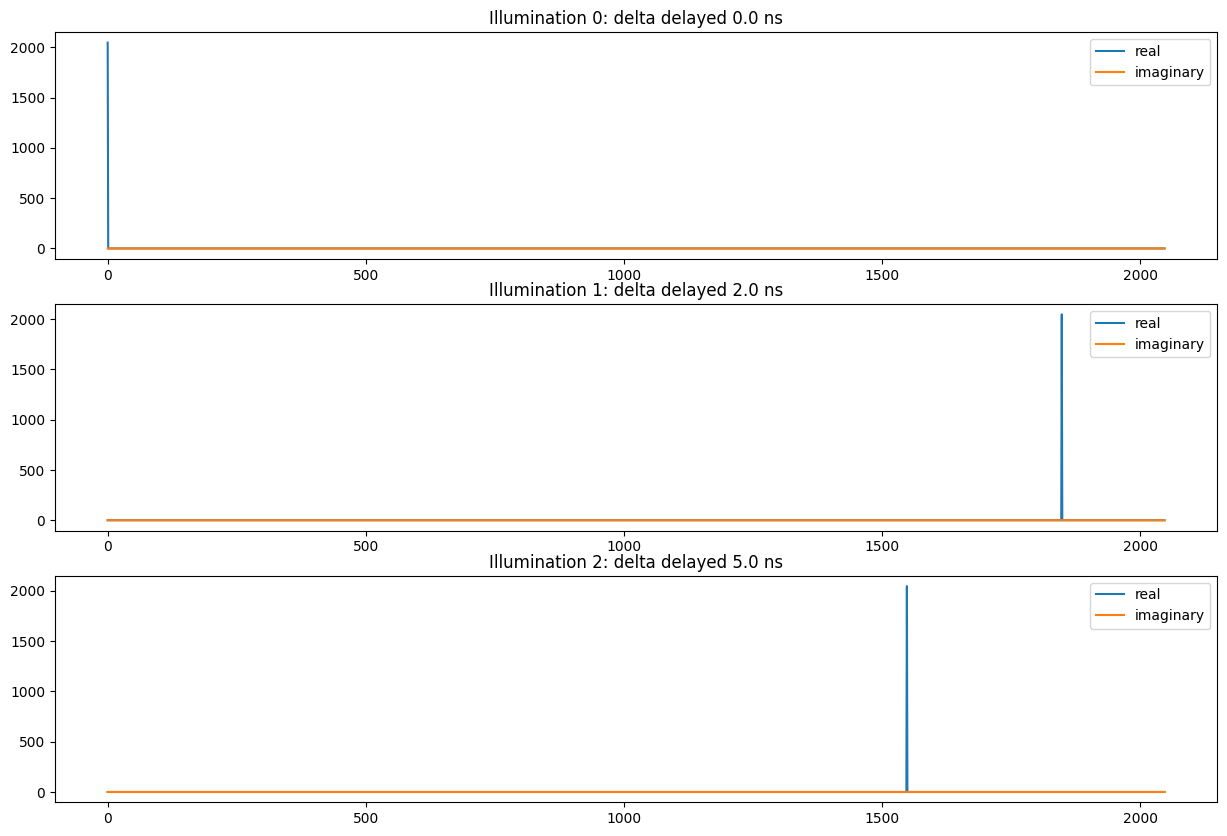

In [8]:
fig, ax = plt.subplots(t_idx.shape[0], 1, figsize=(15, 10))

for i, l in enumerate(int_l):
    ax[i].set_title(f'Illumination {i}: delta delayed {t_0[i]/3e-1} ns')
    ax[i].plot(np.real(l), label='real')
    ax[i].plot(np.imag(l), label='imaginary')
    ax[i].legend()

plt.show()

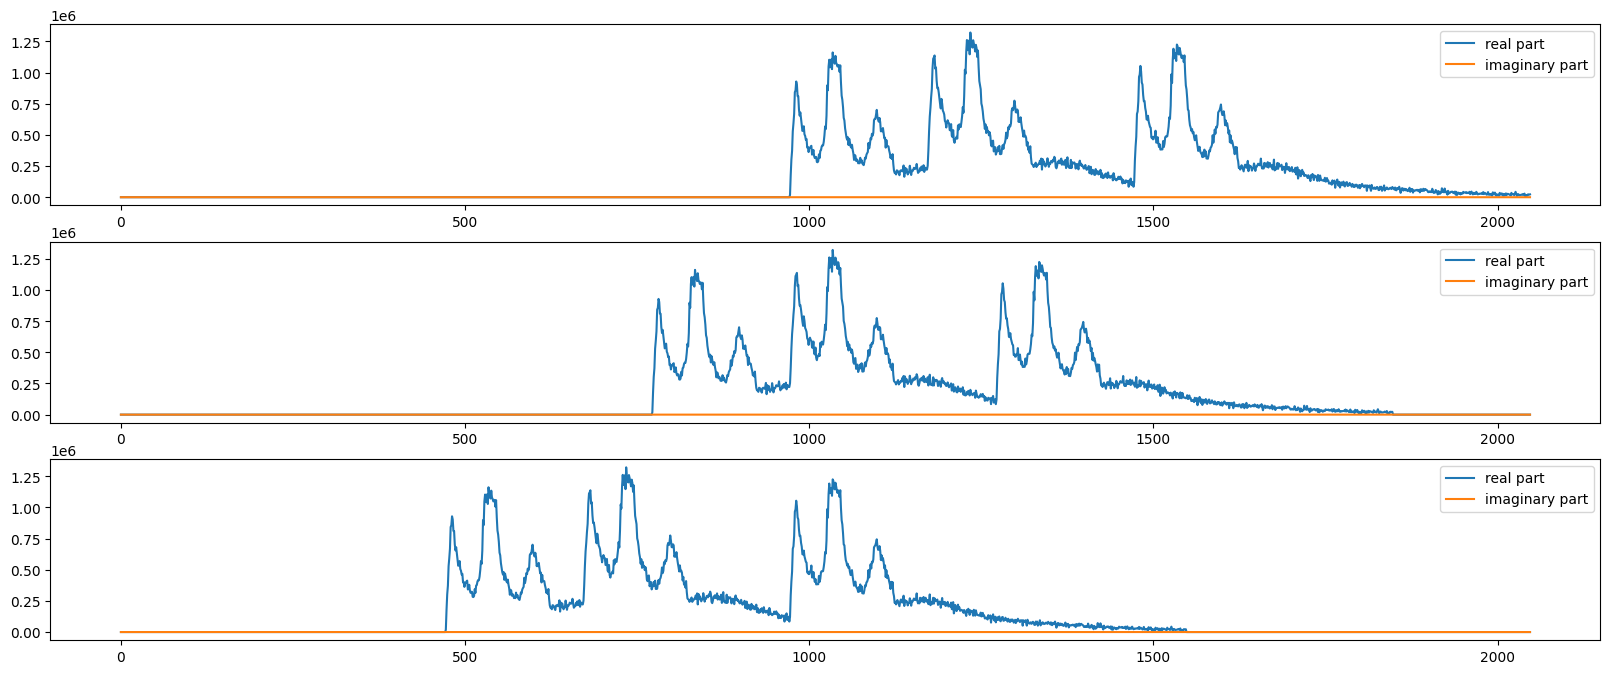

In [9]:
fig, ax = plt.subplots(int_l.shape[0], 1, figsize=(20, 8))
for i, t in enumerate(T_hat_mn[0]):
    ax[i].plot(np.abs(t), label = 'real part')
    ax[i].plot(np.imag(t), label = 'imaginary part')
    ax[i].legend()

plt.show()

In [12]:
ket = dirac.Ket(3+3j, 4+4j)
print(ket.bra().shape, ket.shape)
ket*ket.bra()

(2,) (2,)


AssertionError: Bra and Ket shapes do not match